
            f1_score_test: 0.9987082661608119
            f1_score_min_test: 0.8372977457342868
            precision_score_test: 0.9994479903730572
            recall_score_test: 0.9979736995628048
            accuracy_score_test: 0.9996553142155241
            


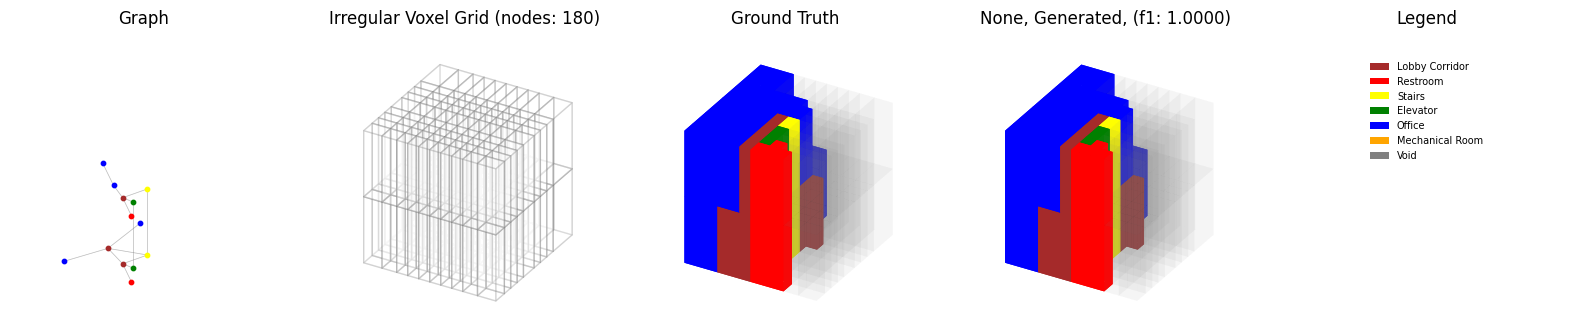

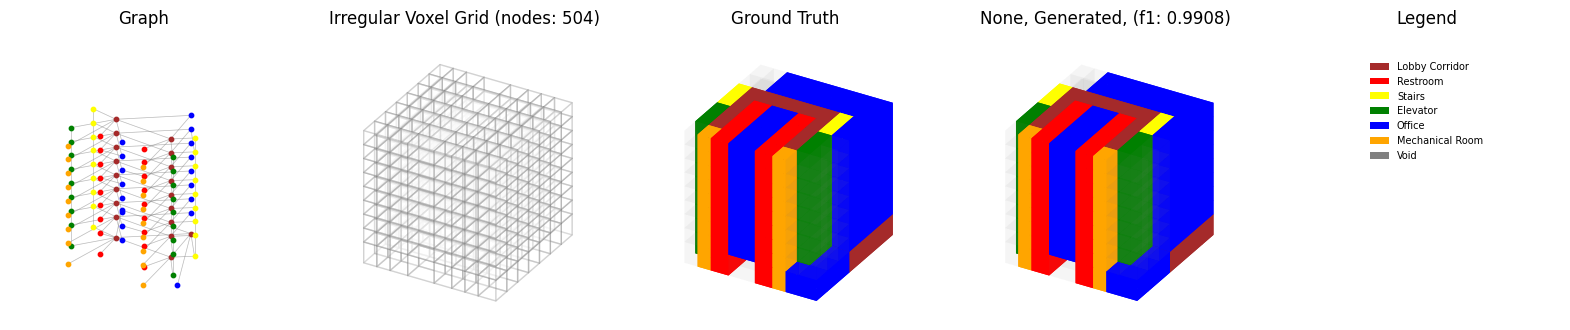

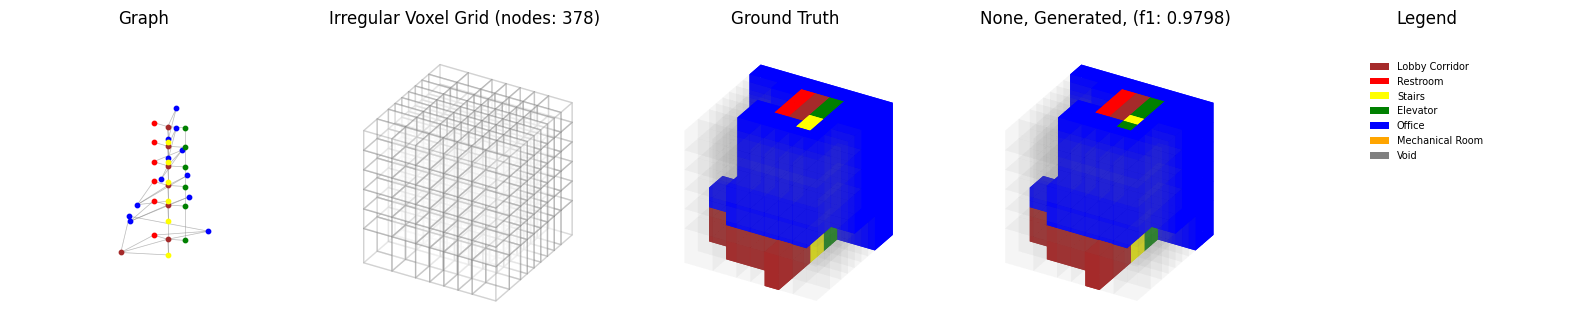

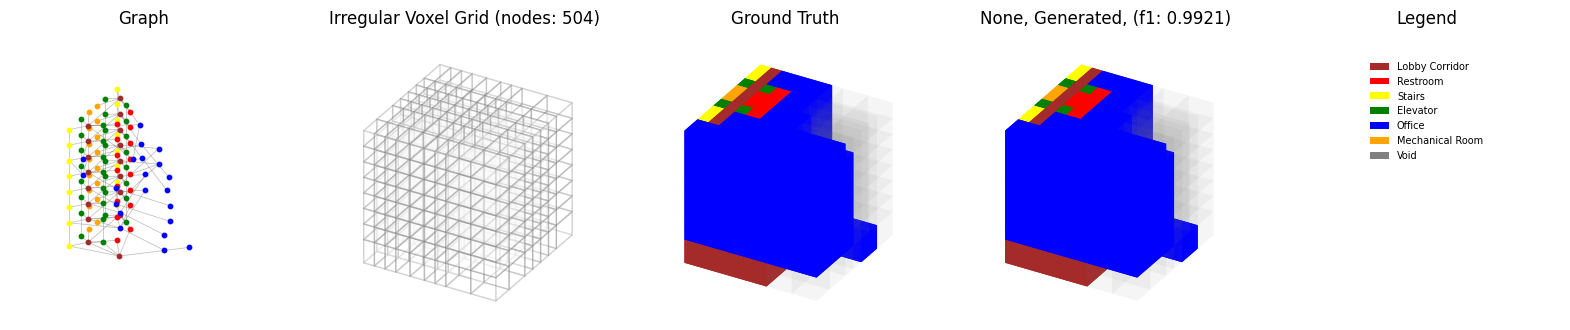

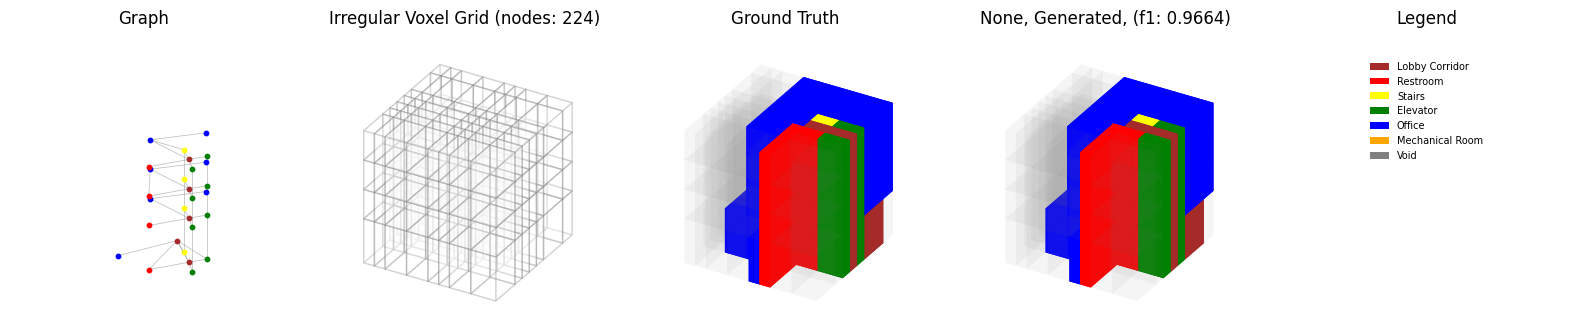

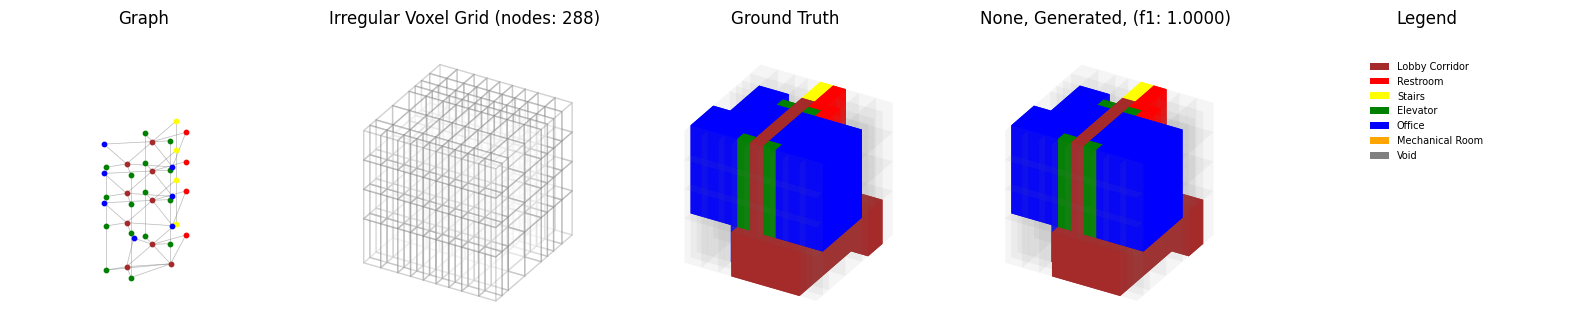

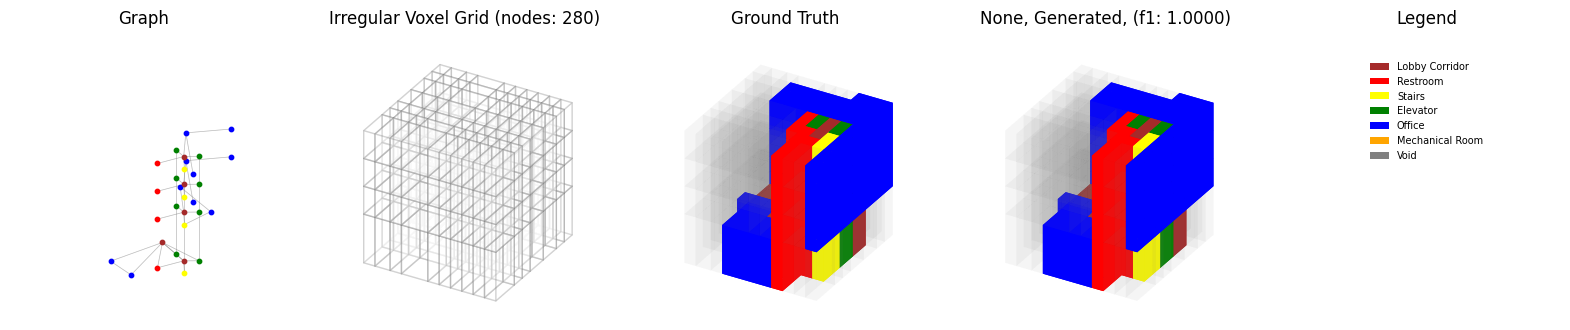

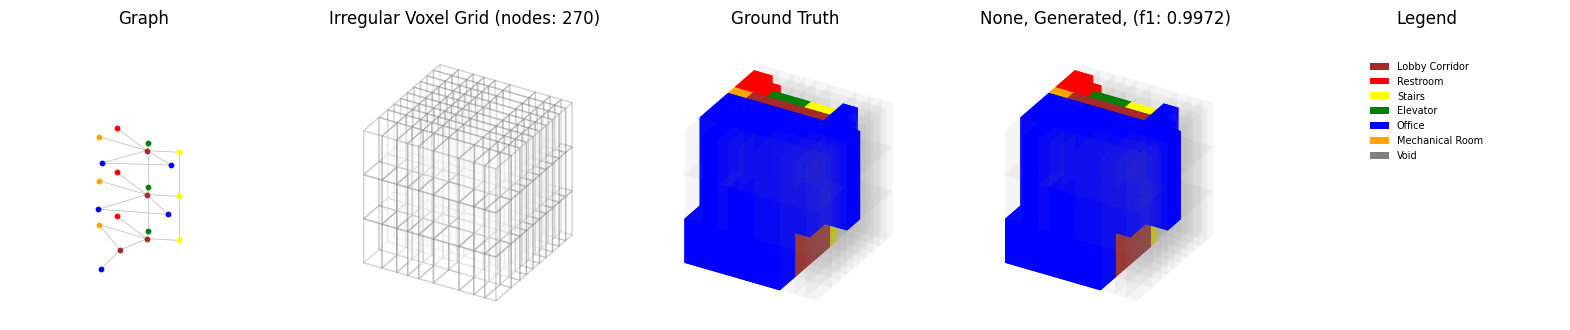

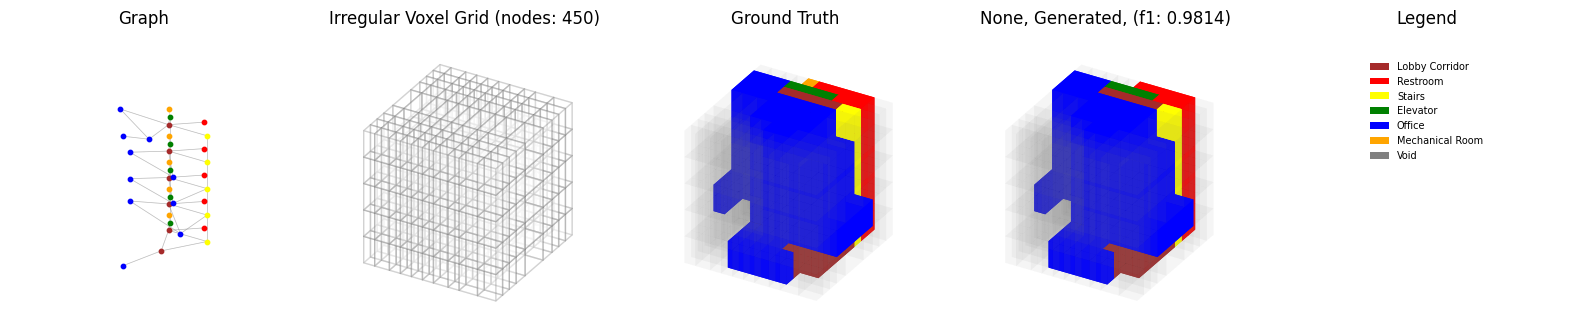

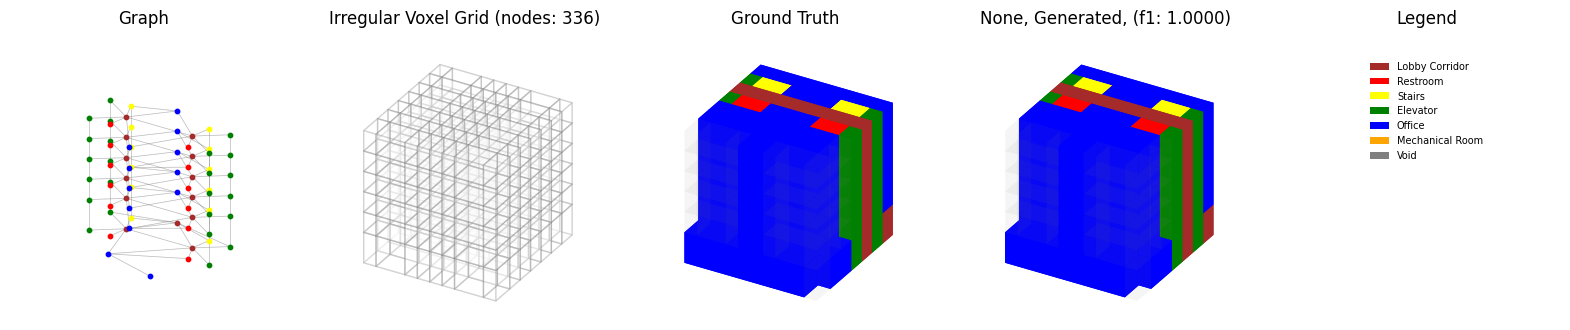

The function evaluate_qualitatively took 28.04928159713745 seconds to run.


In [ ]:
import os
import sys
import torch
from IPython.display import clear_output

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

if os.path.abspath("../../") not in sys.path:
    sys.path.append(os.path.abspath("../../"))

from building_gan.src.config import Configuration
from building_gan.src.data import GraphDataLoaders
from building_gan.src.models import VoxelGNNGenerator, VoxelGNNDiscriminator
from building_gan.src.trainer import Trainer

configuration = Configuration()
configuration.set_seed(777)

dataloaders = GraphDataLoaders(configuration=configuration)

_local_graph, _voxel_graph = dataloaders.train_dataloader.dataset[0]

generator = VoxelGNNGenerator(
    configuration=configuration, 
    local_graph_dim=_local_graph.x.shape[1], 
    voxel_graph_dim=_voxel_graph.x.shape[1]
)

discriminator = VoxelGNNDiscriminator(
    configuration=configuration, 
    local_graph_dim=_local_graph.x.shape[1], 
    voxel_graph_dim=_voxel_graph.x.shape[1]
)

optimizer_generator = torch.optim.AdamW(generator.parameters(), lr=configuration.LEARNING_RATE_GENERATOR)
optimizer_discriminator = torch.optim.AdamW(discriminator.parameters(), lr=configuration.LEARNING_RATE_DISCRIMINATOR)
scheduler_generator = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer_generator, T_max=configuration.EPOCHS)

trainer = Trainer(
    generator=generator,
    discriminator=discriminator,
    dataloaders=dataloaders,
    optimizer_generator=optimizer_generator,
    optimizer_discriminator=optimizer_discriminator,
    scheduler_generator=scheduler_generator,
    configuration=configuration,
    log_dir=os.path.join(configuration.LOG_DIR, "_base")
)

clear_output()

trainer.test(num_samples_to_viz=10)